# Importing data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Toddler data description.docx', 'Toddler Autism dataset July 2018.csv']


In [2]:
autism_data = pd.read_csv('../input/Toddler Autism dataset July 2018.csv', index_col='Case_No')
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
Case_No,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### **Corresponding Q-chat-10-Toddler Features:**
1. Does your child look at you when you call his/her name?
2. How easy is it for you to get eye contact with your child? 
3. Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach) 
4. Does your child point to share interest with you? (e.g. pointing at an interesting sight) 
5. Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
6. Does your child follow where you’re looking? 
7. If you or someone else in the family is visibly upset, does your child show signs of warning to comfort them? (e.g. stroking hair, hugging them)
8. Would you describe your child’s first words as: 
9. Does your child use simple gestures? (e.g. wave goodbye) 
10. Does your child stare at nothing with no apparent purpose?

A1-A10: 
Items within Q-Chat-10 in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. 
For questions 1-9 (A1-A9) in Q-chat-10, if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. 
If the user obtained More than 3 Add points together for all ten questions. 
If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.

http://docs.autismresearchcentre.com/papers/2008_Allison_etal_QCHAT.pdf - **we have to check the compatibility of questions here**

# Exploratory Data Analysis

In [3]:
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64(12), object(6)
memory usage: 156.5+ KB


No missing values, just some of them are categorical

In [4]:
autism_data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
autism_data['Sex'][autism_data['Class/ASD Traits '] == 'Yes'].value_counts(normalize=True)*100

m    73.351648
f    26.648352
Name: Sex, dtype: float64

Percentage of people male and female who are have a risk of autism

In [6]:
# uncomment a line below if you need percentages
# pd.crosstab(autism_data['Ethnicity'], autism_data['Class/ASD Traits ']).apply(lambda r: r/r.sum()*100, axis=1)
pd.crosstab(autism_data['Ethnicity'], autism_data['Class/ASD Traits '])

Class/ASD Traits,No,Yes
Ethnicity,,
Hispanic,10,30
Latino,6,20
Native Indian,0,3
Others,6,29
Pacifica,1,7
White European,84,250
asian,87,212
black,14,39
middle eastern,92,96


People who have risk and do not, sorted by ethnicity

In [7]:
autism_data['Who completed the test'].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

Unique values of the 'Who completed the test' column

In [8]:
autism_data['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

Distribution of the 'Who completed the test' column

In [9]:
autism_data['Jaundice'].value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

Distrubution of people who have jaundice

# Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

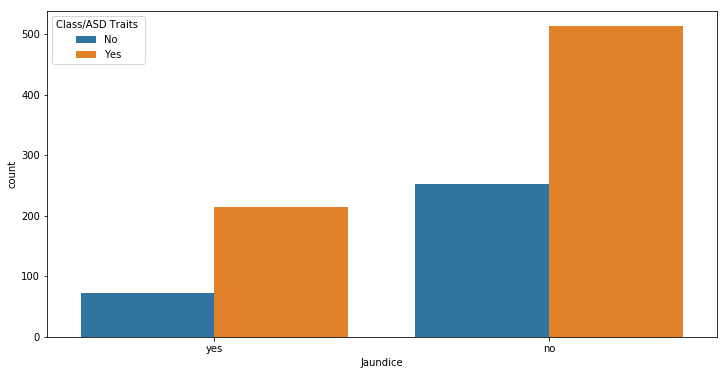

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Jaundice', hue='Class/ASD Traits ', data=autism_data)

<Figure size 864x432 with 0 Axes>

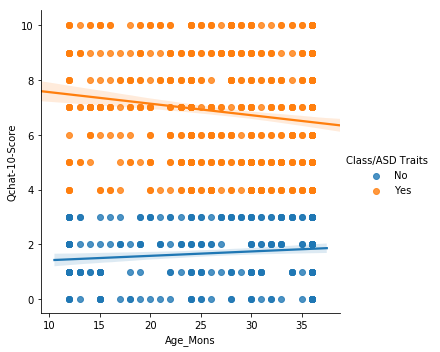

In [12]:
plt.figure(figsize=(12,6))
sns.lmplot('Age_Mons', 'Qchat-10-Score', data=autism_data, hue='Class/ASD Traits ', fit_reg=True)

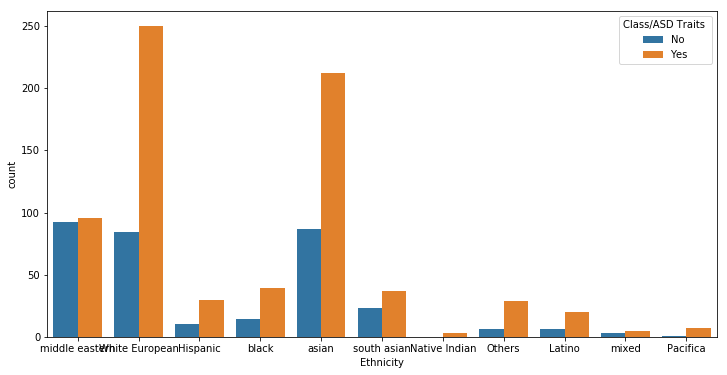

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ethnicity', hue='Class/ASD Traits ', data=autism_data)

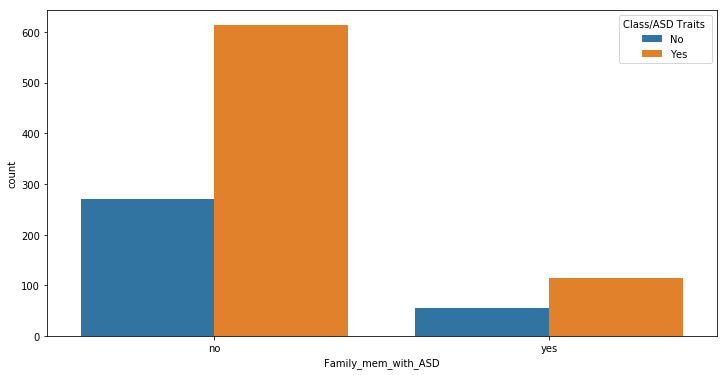

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Family_mem_with_ASD', hue='Class/ASD Traits ', data=autism_data)

# Machine Learning

### Mapping categorical features

In [15]:
autism_data['Sex'] = autism_data['Sex'].map({'m': 0, 'f': 1})
autism_data['Jaundice'] = autism_data['Jaundice'].map({'no': 0, 'yes': 1})
autism_data['Family_mem_with_ASD'] = autism_data['Family_mem_with_ASD'].map({'no': 0, 'yes': 1})
autism_data['Class/ASD Traits '] = autism_data['Class/ASD Traits '].map({'No': 0, 'Yes': 1})

* Yes - 1
* No - 0

In [16]:
autism_data['Who completed the test'].replace('Health care professional', 'Health Care Professional', inplace=True);

We replaced identical values in the 'Who completed the test' column. They were written in upper and lower cases

In [17]:
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
Case_No,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,1,middle eastern,1,0,family member,0
2,1,1,0,0,0,1,1,0,0,0,36,4,0,White European,1,0,family member,1
3,1,0,0,0,0,0,1,1,0,1,36,4,0,middle eastern,1,0,family member,1
4,1,1,1,1,1,1,1,1,1,1,24,10,0,Hispanic,0,0,family member,1
5,1,1,0,1,1,1,1,1,1,1,20,9,1,White European,0,1,family member,1


### Label Encoding of categorical features

In [18]:
object_cols = ['Ethnicity', 'Who completed the test']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_autism_data = autism_data.copy()

for col in object_cols:
    label_autism_data[col] = label_encoder.fit_transform(autism_data[col])

In [19]:
label_autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
Case_No,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,1,8,1,0,3,0
2,1,1,0,0,0,1,1,0,0,0,36,4,0,5,1,0,3,1
3,1,0,0,0,0,0,1,1,0,1,36,4,0,8,1,0,3,1
4,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,3,1
5,1,1,0,1,1,1,1,1,1,1,20,9,1,5,0,1,3,1


### Making a train/test split for Machine Learning

In [20]:
X = label_autism_data.drop(['Class/ASD Traits '], axis=1)
y = label_autism_data['Class/ASD Traits ']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

### Finding best parameters for Random Forest Classifier using Grid Search

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {'max_depth': np.arange(1, 11), 'n_estimators': np.arange(100, 1100, 100)}

In [23]:
forest = RandomForestClassifier(random_state=0)

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)

best_forest = GridSearchCV(estimator=forest, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [24]:
best_forest.fit(X_train, y_train)
best_forest.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


{'max_depth': 1, 'n_estimators': 100}

In [25]:
best_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
best_forest.best_score_

1.0

### Accuracy of our model (Random Forest Classifier)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, best_forest.predict(X_test))

0.9988151658767772